## 14 - A world map
>Map the whole world. Whether it’s continents, ecosystems, or oceans, this is the day to map the entire planet. 🌍

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from shapely import Point, LineString
import numpy as np

In [2]:
# from here https://en.wikipedia.org/wiki/Land_and_water_hemispheres
land = (-1.533333, 47.216667)
water = (178.466667, -47.216667)

# or for poles of inaccessibility:
# water =   (-123.393333, -48.876667)
# land =  (86.666667,  46.283333)

In [3]:
# helpers
def text_along_path(text, curve, ax, **kwargs):
    '''
    plots `text` along the `curve` on axes (`ax`)
    `kwargs` passed to `ax.text()`
    
    curve is array of shape (n,2)
    doesn't do any checks.
    requires some fanangling to get spacing right
    '''
    if isinstance(curve, LineString):
        ls = curve
        _x, _y = ls.coords.xy
        curve = np.c_[_x, _y]
    
    text_length = len(text)

    text_points = ls.interpolate(np.linspace(0, 1, text_length),
                                 normalized=True)
    text_x = [p.x for p in text_points]
    text_y = [p.y for p in text_points]

    dydx = np.gradient(curve[:,1], curve[:,0])
    angles = np.degrees(np.arctan(np.interp(text_x, curve[:,0], dydx)))

    for x, y, angle, t in zip(text_x, text_y, angles, text):
        ax.text(x, y, t, rotation=angle, rotation_mode='anchor', **kwargs)

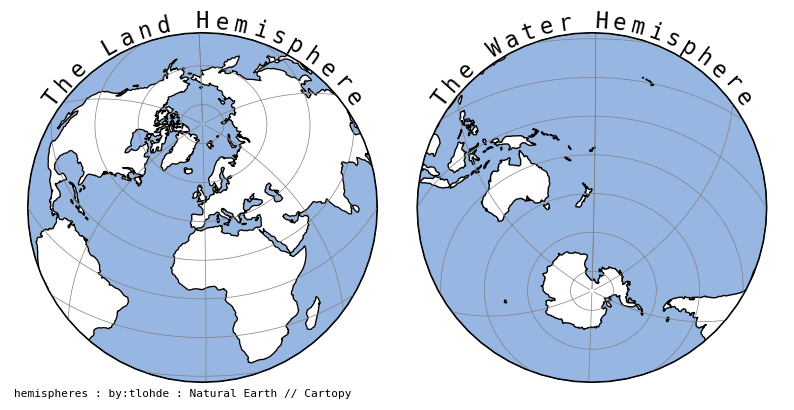

In [ ]:
fig = plt.figure(figsize=[10,5])

for i, hl in enumerate(zip([land, water], ['Land', 'Water'])):
    h, l = hl
    projection=ccrs.AzimuthalEquidistant(
        central_longitude=h[0],
        central_latitude=h[1]
        )
    
    ax = fig.add_subplot(1,2,1+i,
                         projection=projection
                         )

    # making plot circular / clipping to "equator"
    _, _, maxx, _ = projection.boundary.bounds
    _x, _y = Point(0,0).buffer(maxx/2).exterior.coords.xy
    circle = mpath.Path(list(zip(_x, _y)))
    ax.plot(_x, _y, c='k') # for some reason if i don't plot this the axes go really small?!?

    ax.patch.set_clip_path(circle, transform=ax.transData)
    ax.set_boundary(circle)
    
    ax.coastlines()
    # and for some reason the order seems to matter...here
    if i == 0:
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.LAND, color='w')
        
    if i == 1:
        ax.add_feature(cfeature.LAND, color='w')
        ax.add_feature(cfeature.OCEAN)
    
    ax.gridlines(color='gray', linewidth=0.5)
    
    
    text_along_path(f'The {l} Hemisphere',
                LineString(
                    [LineString(list(zip(_x,_y))).interpolate(i, normalized=True)
                    for i in np.arange(0.6, 0.9, 0.01)]),
                ax=ax,
                fontsize=16,
                font='DejaVu Sans Mono',
                # fontstyle='italic',
                ha='center',
                va='bottom')
    
    if i ==0:
        ax.annotate('hemispheres : by:tlohde : Natural Earth // Cartopy',
                    xy=(0.01,0.01),
                    xycoords='axes fraction',
                    font='DejaVu Sans Mono',
                    fontsize=8)

    
plt.subplots_adjust(wspace=0.01)

fig.savefig('day14.png', dpi=300, bbox_inches='tight')